In [116]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate
import matplotlib

### Definice funkcí

In [117]:

    
def damped_oscilator(t, A, delta, w, phi, x0):
    """
    t - čas, A - amplituda, delta - koeficient útlumu, w - frekvence, phi - fázový posun, x0 - vertikální posun
    """
    return A * np.exp(-delta*t) * np.sin(w*t + phi) + x0

def undamped_frequency(t, amplitude, p0=None):
    coef, cov = curve_fit(damped_oscilator, t,amplitude,p0 = p0)
    A, delta, w, phi, x0 = coef
    err = np.sqrt(np.diag(cov))
    
    return([A, delta, w, phi, x0], err)

def decimal(x):
    return x.replace(',', '.').encode()

def load_data(name):
    t,amplitude = np.genfromtxt((decimal(x) for x in open(name)), delimiter='\t',unpack = True, skip_header=2)
    return t,amplitude

In [118]:
def mean(arr):
    return np.mean(arr)

def error():
    return

def weighted_error(x, err):
    
    x = np.asarray(x)
    err = np.asarray(err)
    
    average = np.sum(x/(err**2))/np.sum(1/err**2)
    
    average_error = 1/np.sqrt(np.sum(1/err**2))
    
    return average, average_error

# **Ukol 2**

In [119]:
parameters = []
parameters_err = []

for i in range(4):
    #print(undamped_frequency(*load_data("data/undapmed_{}.txt".format(i+1))))
    parameters.append(undamped_frequency(*load_data("kyvadlo/ukol 2/{}.txt".format(i+1)))[0])
    parameters_err.append(undamped_frequency(*load_data("kyvadlo/ukol 2/{}.txt".format(i+1)))[1])

parameters = np.array(parameters)
parameters_err = np.array(parameters_err)

delta_array = parameters[:,1]
w_array = parameters[:,2]

delta_err_array = parameters_err[:,1]
w_err_array = parameters_err[:,2]

print(delta_array,delta_err_array,w_array,w_err_array)
print("A: {}".format(parameters[:,0]))
print("delta: {}".format(parameters[:,1]))
print("w: {}".format(parameters[:,2]))
print("phi: {}".format(parameters[:,3]))
print("x0: {}".format(parameters[:,4]))

[0.11580541 0.10192032 0.09420088 0.10773429] [0.00080386 0.00082431 0.0009083  0.00102335] [ 3.7404773  -3.7347908   3.75030034  3.74627377] [0.00082263 0.00078097 0.00092904 0.00099562]
A: [ 0.26076295 -0.38490003  0.39067599  0.35483609]
delta: [0.11580541 0.10192032 0.09420088 0.10773429]
w: [ 3.7404773  -3.7347908   3.75030034  3.74627377]
phi: [-1.85896646 -5.29665771 -1.71610101 -0.77596204]
x0: [-0.01066872 -0.00828081 -0.01722315 -0.02591743]


### Fit tabulka

In [120]:
###### ZAOKROUHLENI ########

parameters_rounded = np.round(parameters,4)
parameters_err_rounded = np.round(parameters_err,4)

print(parameters_rounded)
print(parameters_err_rounded)

[[ 0.2608  0.1158  3.7405 -1.859  -0.0107]
 [-0.3849  0.1019 -3.7348 -5.2967 -0.0083]
 [ 0.3907  0.0942  3.7503 -1.7161 -0.0172]
 [ 0.3548  0.1077  3.7463 -0.776  -0.0259]]
[[0.0007 0.0008 0.0008 0.003  0.0002]
 [0.0014 0.0008 0.0008 0.0034 0.0004]
 [0.0019 0.0009 0.0009 0.0052 0.0005]
 [0.0018 0.001  0.001  0.0047 0.0005]]


In [121]:
table = []
table.append(np.array([x for x in range(1,6)]))
for i in range(5):
    table.append(parameters_rounded[:,i])
    table.append(parameters_err_rounded[:,i])

T = np.array(table).T
print(T)

[array([1, 2, 3, 4, 5]) array([ 0.2608, -0.3849,  0.3907,  0.3548])
 array([0.0007, 0.0014, 0.0019, 0.0018])
 array([0.1158, 0.1019, 0.0942, 0.1077])
 array([0.0008, 0.0008, 0.0009, 0.001 ])
 array([ 3.7405, -3.7348,  3.7503,  3.7463])
 array([0.0008, 0.0008, 0.0009, 0.001 ])
 array([-1.859 , -5.2967, -1.7161, -0.776 ])
 array([0.003 , 0.0034, 0.0052, 0.0047])
 array([-0.0107, -0.0083, -0.0172, -0.0259])
 array([0.0002, 0.0004, 0.0005, 0.0005])]


C:\Users\stepa\AppData\Local\Temp/ipykernel_15520/2598973162.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  T = np.array(table).T


In [122]:
print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrrrr}
\toprule
  1      &  2      &  3      &  4      & 5 \\
  0.2608 & -0.3849 &  0.3907 &  0.3548 &   \\
  0.0007 &  0.0014 &  0.0019 &  0.0018 &   \\
  0.1158 &  0.1019 &  0.0942 &  0.1077 &   \\
  0.0008 &  0.0008 &  0.0009 &  0.001  &   \\
  3.7405 & -3.7348 &  3.7503 &  3.7463 &   \\
  0.0008 &  0.0008 &  0.0009 &  0.001  &   \\
 -1.859  & -5.2967 & -1.7161 & -0.776  &   \\
  0.003  &  0.0034 &  0.0052 &  0.0047 &   \\
 -0.0107 & -0.0083 & -0.0172 & -0.0259 &   \\
  0.0002 &  0.0004 &  0.0005 &  0.0005 &   \\
\bottomrule
\end{tabular}


### Vzorec pro chybu

In [123]:
Sdelta = smp.symbols(r'\sigma_{\delta}')
Somega = smp.symbols(r'\sigma_{\omega}')
Somega0 = smp.symbols(r'\sigma_{\omega_0}')

Delta = smp.symbols('\delta')
Omega = smp.symbols('\omega')
Omega0 = smp.symbols('\omega_0}')

Omega0 = smp.sqrt(Omega**2+Delta**2)

### DERIVACE ####
dOmega0dOmega = smp.diff(Omega0,Omega)
dOmega0dDelta = smp.diff(Omega0,Delta)

###### CHYBA w0 ########
Somega0 = smp.sqrt(dOmega0dOmega**2*Somega**2 + dOmega0dDelta**2*Sdelta**2)
Somega0 = smp.simplify(Somega0)

####### w0 z Delta a w #######
w_to_w0 = smp.lambdify([Omega,Delta], Omega0)
####### W0 chyba #######
w0_err = smp.lambdify([Omega,Delta,Somega,Sdelta],Somega0)

Somega0 

sqrt((\delta**2*\sigma_{\delta}**2 + \omega**2*\sigma_{\omega}**2)/(\delta**2 + \omega**2))

### Vypocet w0

In [124]:
w0_arr = []
sw0_arr = []

for w,d,sw,sd in zip(w_array,delta_array,w_err_array,delta_err_array):
    w0_arr.append(w_to_w0(w,d))
    sw0_arr.append(w0_err(w,d,sw,sd))
    
print(w0_arr,sw0_arr)

[3.742269538714158, 3.7361812122416826, 3.7514832363019197, 3.7478225415174062] [0.0008226112601502017, 0.000781005605484308, 0.0009290256745278771, 0.0009956425499387108]


In [125]:
w0,sw0 = weighted_error(w0_arr,sw0_arr)
print(w0,sw0)

3.743460850460599 0.00043500426582496464


In [126]:
exp = np.log10(sw0)
exp_floor = int(np.floor(exp))  # je potreba pretypovat vysledek na cele cislo
print(exp, exp_floor)

chyba = np.round(sw0, -exp_floor)  # zaporna hodnota udava pocet desetinnych mist
print(chyba)

hodnota = np.round(w0, -exp_floor)
print(hodnota)

jednotka = 's^{-1}'
vysledek = '$({}\pm{})$~{}'.format(hodnota, chyba, jednotka)  # funkce format vlozi promenne do sloznych zavorek {}
print(vysledek)

-3.3615064841599396 -4
0.0004
3.7435
$(3.7435\pm0.0004)$~s^{-1}


In [127]:
w0_rounded = np.round(w0_arr, 4)
sw0_rounded = np.round(sw0_arr, 4)
print(w0_rounded,sw0_rounded)

T = np.array([w0_rounded,sw0_rounded]).T

[3.7423 3.7362 3.7515 3.7478] [0.0008 0.0008 0.0009 0.001 ]


In [128]:
print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rr}
\toprule
 3.7423 & 0.0008 \\
 3.7362 & 0.0008 \\
 3.7515 & 0.0009 \\
 3.7478 & 0.001  \\
\bottomrule
\end{tabular}


### Vypocet delta undamped

In [129]:
delta,sdelta = weighted_error(delta_array,delta_err_array)
print(delta,sdelta)

0.10532982250595568 0.0004391112715193976


In [130]:
exp = np.log10(sdelta)
exp_floor = int(np.floor(exp))  # je potreba pretypovat vysledek na cele cislo
print(exp, exp_floor)

chyba = np.round(sdelta, -exp_floor)  # zaporna hodnota udava pocet desetinnych mist
print(chyba)

hodnota = np.round(delta, -exp_floor)
print(hodnota)

jednotka = 's^{-1}'
vysledek = '$({}\pm{})$~{}'.format(hodnota, chyba, jednotka)  # funkce format vlozi promenne do sloznych zavorek {}
print(vysledek)

-3.3574254148750025 -4
0.0004
0.1053
$(0.1053\pm0.0004)$~s^{-1}


### Graf

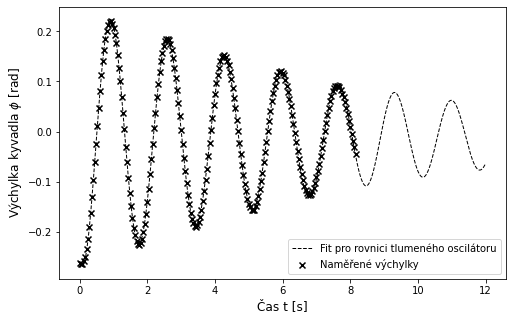

In [131]:
t, amplitude = load_data("kyvadlo/ukol 2/1.txt")
t_range = np.linspace(0,12,1000)

plt.figure(figsize = (8,5))

coef, _ = curve_fit(damped_oscilator, t,amplitude)
A, delta, w, phi, x0 = coef

plt.scatter(t,amplitude, marker = 'x', color='black', label='Naměřené výchylky')

plt.plot(t_range, damped_oscilator(t_range,A, delta, w, phi, x0), color="k", linestyle='dashed', linewidth=1, label='Fit pro rovnici tlumeného oscilátoru')

plt.legend(loc='lower right')

#popisky os
plt.ylabel("Výchylka kyvadla $ \phi $ [rad]", fontsize=12)
plt.xlabel("Čas t [s]", fontsize=12)


plt.savefig('Undamped_fit_example.pdf')
plt.show()

# **Ukol 3**

In [132]:
Amperage = ["0.15","0.34","0.65","1","1.22","1.35","1.55", "1.75"]
A = [0.15,0.35,0.65,1,1.22,1.35,1.55,1.75]
data = {}

### Fit damped kmitu

In [133]:

for a in Amperage:
    
    parameters = []
    parameters_err = []
    
    for i in range(1):
        
        parameters.append(undamped_frequency(*load_data("kyvadlo/ukol 3/{}A.txt".format(a,i+1)))[0])
        parameters_err.append(undamped_frequency(*load_data("kyvadlo/ukol 3/{}A.txt".format(a,i+1)))[1])
        
        
    parameters = np.array(parameters)
    parameters_err = np.array(parameters_err)
    
    #print(parameters)
        
    delta_array = parameters[:,1]
    delta_err_array = parameters_err[:,1]
        
        
    data[a] = delta_array,delta_err_array
    

### Prumer a chyba tlumeni

In [134]:
delta_final = []
delta_errorbars = []

for a in Amperage:
    delta, delta_err = weighted_error(data[a][0],data[a][1])
    delta_final.append(delta)
    delta_errorbars.append(delta_err)

print(delta_final)
print(delta_errorbars)

[0.08398598241815698, 0.0898957368782143, 0.10247326061228429, 0.16522409221227127, 0.2125386867008723, 0.2361251751953665, 0.2902627018422855, 0.3495102179420544]
[0.0002614141363062661, 0.00020751172680922756, 0.0003707689732879847, 0.0010750246041186574, 0.0016020738566690622, 0.0016737898337464408, 0.002438741178019539, 0.0029612453862017064]


### Tabulka vyslednych delt

In [135]:
delta_rounded = np.round(delta_final, 4)
sdelta_rounded = np.round(delta_errorbars, 4)
print(delta_rounded,sdelta_rounded)

T = np.array([A,delta_rounded,sdelta_rounded]).T

print(tabulate(T, tablefmt="latex_booktabs"))

[0.084  0.0899 0.1025 0.1652 0.2125 0.2361 0.2903 0.3495] [0.0003 0.0002 0.0004 0.0011 0.0016 0.0017 0.0024 0.003 ]
\begin{tabular}{rrr}
\toprule
 0.15 & 0.084  & 0.0003 \\
 0.35 & 0.0899 & 0.0002 \\
 0.65 & 0.1025 & 0.0004 \\
 1    & 0.1652 & 0.0011 \\
 1.22 & 0.2125 & 0.0016 \\
 1.35 & 0.2361 & 0.0017 \\
 1.55 & 0.2903 & 0.0024 \\
 1.75 & 0.3495 & 0.003  \\
\bottomrule
\end{tabular}


### Graf

In [136]:
A_err = np.empty(5, dtype = float)
A_err.fill(0.01)
A_err

array([0.01, 0.01, 0.01, 0.01, 0.01])

In [137]:
def fit_funkce(x,a,b): ##definice linearni funkce, kterou se to pokusi fitnout, a je parametr, ktery bude menen pri fitovani
    return a*x**2 + b

params, cov = curve_fit(fit_funkce, A, delta_final,sigma=delta_errorbars) #provede fit a najde optimallni hodnotu koeficientu a
a,b = params
fit_error = np.sqrt(np.diag(cov))
sa,sb = fit_error

print("a: {} +- {}".format(a,sa))
print("b: {} +- {}".format(b,sb))

a: 0.08137630339097376 +- 0.006507811791369824
b: 0.07911923205250761 +- 0.002439627791128476


In [138]:
chyba = np.round(sa, 3)  # zaporna hodnota udava pocet desetinnych mist
print(chyba)

hodnota = np.round(a, 3)
print(hodnota)

jednotka = 's^{-1}A^{-2}'
vysledek = '$({}\pm{})$~{}'.format(hodnota, chyba, jednotka)  # funkce format vlozi promenne do sloznych zavorek {}
print(vysledek)

chyba = np.round(sb, 3)  # zaporna hodnota udava pocet desetinnych mist
print(chyba)

hodnota = np.round(b, 3)
print(hodnota)

jednotka = '$s^{-1}$'
vysledek = '$({}\pm{})$~{}'.format(hodnota, chyba, jednotka)  # funkce format vlozi promenne do sloznych zavorek {}
print(vysledek)

0.007
0.081
$(0.081\pm0.007)$~s^{-1}A^{-2}
0.002
0.079
$(0.079\pm0.002)$~$s^{-1}$


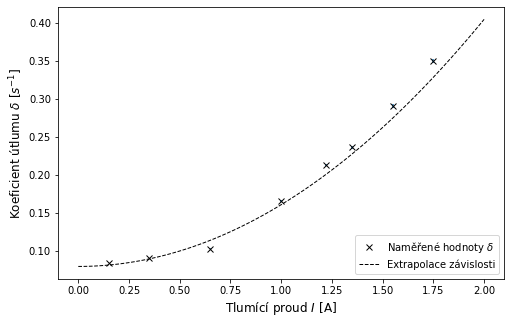

In [139]:
x_funkce = np.linspace(0,2,100)

plt.figure(figsize = (8,5))

plt.plot(A, delta_final, 'x', color='black', label='Naměřené hodnoty $\delta$')
plt.errorbar(A, delta_final, yerr=delta_errorbars, fmt='none')

plt.plot(x_funkce, fit_funkce(x_funkce,a,b), color="k", linestyle='dashed', linewidth=1, label='Extrapolace závislosti')

plt.legend(loc='lower right')

#popisky os
plt.ylabel("Koeficient útlumu $\delta$ [$s^{-1}$]", fontsize=12)
plt.xlabel("Tlumící proud $I$ [A]", fontsize=12)


plt.savefig('Current_delta.pdf')
plt.show()

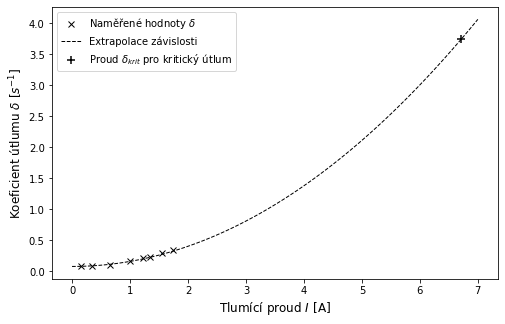

In [140]:
x_funkce = np.linspace(0,7,100)

#np.full(shape=100, fill_value=w0)

plt.figure(figsize = (8,5))

plt.plot(A, delta_final, 'x', color='black', label='Naměřené hodnoty $\delta$')
plt.errorbar(A, delta_final, yerr=delta_errorbars, fmt='none')

plt.plot(x_funkce, fit_funkce(x_funkce,a,b), color="k", linestyle='dashed', linewidth=1, label='Extrapolace závislosti')

plt.scatter(np.sqrt((w0 - b)/a),w0,marker='+', s=75 ,color = 'k', label = 'Proud $\delta_{krit}$ pro kritický útlum')

#plt.plot( np.full(shape=100, fill_value=np.sqrt((w0 - b)/a)) ,np.linspace(0,4.5,100), linestyle = 'dotted',color = 'k', linewidth=0.5)
#plt.plot(x_funkce,np.full(shape=100, fill_value=w0), linestyle = 'dotted',color = 'k', linewidth=0.5)

plt.legend(loc='upper left')

#popisky os
plt.ylabel("Koeficient útlumu $\delta$ [$s^{-1}$]", fontsize=12)
plt.xlabel("Tlumící proud $I$ [A]", fontsize=12)


plt.savefig('Current_delta_krit.pdf')
plt.show()

In [141]:
print(fit_funkce(0.42,a,b)) 
print(fit_funkce(1.42,a,b))

0.09347401197067537
0.24320641021006711


### Urceni tlumiciho proudu

In [142]:
Akrit = np.sqrt((w0 - b)/a)
Akrit

6.710409115977542

In [143]:
sAkrit = (np.sqrt(sw0**2+sb**2+(sa*(w0-b))**2))/a
sAkrit

0.29462212306064245

In [144]:
exp = np.log10(sAkrit)
exp_floor = int(np.floor(exp))  # je potreba pretypovat vysledek na cele cislo
print(exp, exp_floor)

chyba = np.round(sAkrit, -exp_floor)  # zaporna hodnota udava pocet desetinnych mist
print(chyba)

hodnota = np.round(Akrit, -exp_floor)
print(hodnota)

jednotka = 'A'
vysledek = '$({}\pm{})$~{}'.format(hodnota, chyba, jednotka)  # funkce format vlozi promenne do sloznych zavorek {}
print(vysledek)

-0.5307346452652033 -1
0.3
6.7
$(6.7\pm0.3)$~A


# **Ukol 5**

In [145]:
V = [2.01,4.02,6.01, 8, 10.07,12.06,14.07,15.98]
RPM = [6.6,16.1,24.3,33.1,42.5,51.3,60.2,69.1]
print(V)
print(RPM)

[2.01, 4.02, 6.01, 8, 10.07, 12.06, 14.07, 15.98]
[6.6, 16.1, 24.3, 33.1, 42.5, 51.3, 60.2, 69.1]


In [146]:
T = np.array([V,RPM]).T

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rr}
\toprule
  2.01 &  6.6 \\
  4.02 & 16.1 \\
  6.01 & 24.3 \\
  8    & 33.1 \\
 10.07 & 42.5 \\
 12.06 & 51.3 \\
 14.07 & 60.2 \\
 15.98 & 69.1 \\
\bottomrule
\end{tabular}


In [147]:
def RPM_func(voltage,a,b):
    return a*voltage + b

coef, cov = curve_fit(RPM_func, V, RPM)

fit_error = np.sqrt(np.diag(cov))

a,b = coef
sa,sb = fit_error

print(a,b)
print(sa,sb)

4.447785793360021 -2.2523862624395092
0.020322678881405657 0.2058134456603811


In [148]:
chyba = np.round(sa, 3)  # zaporna hodnota udava pocet desetinnych mist
print(chyba)

hodnota = np.round(a, 3)
print(hodnota)

jednotka = '$ot \cdot V^{-1} \cdot min^{-1}$'
vysledek = '$({}\pm{})$~{}'.format(hodnota, chyba, jednotka)  # funkce format vlozi promenne do sloznych zavorek {}
print(vysledek)

chyba = np.round(sb, 1)  # zaporna hodnota udava pocet desetinnych mist
print(chyba)

hodnota = np.round(b, 1)
print(hodnota)

jednotka = 'ot/min'
vysledek = '$({}\pm{})$~{}'.format(hodnota, chyba, jednotka)  # funkce format vlozi promenne do sloznych zavorek {}
print(vysledek)

0.02
4.448
$(4.448\pm0.02)$~$ot \cdot V^{-1} \cdot min^{-1}$
0.2
-2.3
$(-2.3\pm0.2)$~ot/min


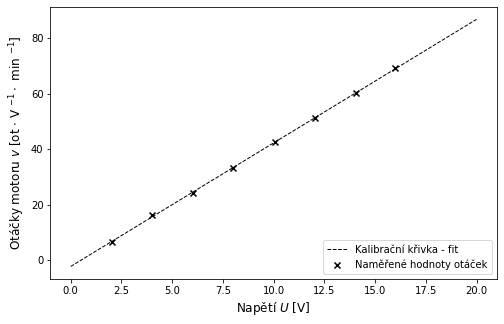

In [149]:
x_range = np.linspace(0,20,100)

plt.figure(figsize = (8,5))

plt.scatter(V, RPM, marker = 'x', color='black', label='Naměřené hodnoty otáček')

plt.plot(x_range, RPM_func(x_range,a,b), color="k", linestyle='dashed', linewidth=1, label='Kalibrační křivka - fit')

plt.legend(loc='lower right')

#popisky os
plt.ylabel("Otáčky motoru $v$ [ot $\cdot$ V $^{-1} \cdot$ min $^{-1}$]", fontsize=12)
plt.xlabel("Napětí $U$ [V]", fontsize=12)


plt.savefig('Calibration_curve.pdf')
plt.show()

# **Ukol 6**

In [150]:
def rpm_to_omega(x):
    return 2*np.pi*x/60


In [151]:
def forced_funkce(freq,d,omega,B):
    return B/np.sqrt(4*(d**2)*(freq**2)+ (omega**2-freq**2)**2)

def forced_funkce1(freq,omega,B):
    return B/np.sqrt(4*(0.06515004582991206**2)*(freq**2)+ (omega**2-freq**2)**2)

def forced_funkce2(freq,omega,B):
    return B/np.sqrt(4*(0.08716939970413233**2)*(freq**2)+ (omega**2-freq**2)**2)

def forced_funkce3(freq,omega,B):
    return B/np.sqrt(4*(0.2474341792948645**2)*(freq**2)+ (omega**2-freq**2)**2)

### Bez útlumu

In [152]:
########## BUDE TO JESTE DVAKRAT, amplitude1/2/3 je max. amplituda pro mereni a V1/2/3 je napeti pro dane amplitudy ############### 
V1 =         np.array([4.42,5.20,5.67,6.57,7.22,7.66,7.89,8.01,8.19,8.55]) ##u 8.8 nepresne, protoze kyvadlo nemuze kmitad dal kvuli zarazce
amplitude1 = np.array([0.187,0.251,0.284,0.335,0.419,0.595,0.737,0.847,1.199,2.683])

frequency1 = rpm_to_omega(RPM_func(V1,a,b))
frequency1_normalised = frequency1/w0

In [153]:
T = np.array([V1,np.round(frequency1,2),amplitude1]).T
print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrr}
\toprule
 4.42 & 1.82 & 0.187 \\
 5.2  & 2.19 & 0.251 \\
 5.67 & 2.41 & 0.284 \\
 6.57 & 2.82 & 0.335 \\
 7.22 & 3.13 & 0.419 \\
 7.66 & 3.33 & 0.595 \\
 7.89 & 3.44 & 0.737 \\
 8.01 & 3.49 & 0.847 \\
 8.19 & 3.58 & 1.199 \\
 8.55 & 3.75 & 2.683 \\
\bottomrule
\end{tabular}


In [154]:
coef, cov = curve_fit(forced_funkce, frequency1, amplitude1,p0=[0.065,3.7385,4])
fit_error = np.sqrt(np.diag(cov))

d1,omega1,B1 = coef
sd1,somega1,sB1 = fit_error

print(d1,omega1,B1)
print(sd1,somega1,sB1)

0.08370457943776459 3.806074720530212 2.072072380277003
0.009379133421408373 0.022928018552040814 0.13532358619553309


### Slabý útlum 0.42A

In [155]:
V2 = np.array([11.62,10.6,9.6,8.75,8.19,7.95,7.43,7.04,6.04] ) ##u 8.8 nepresne, protoze kyvadlo nemuze kmitad dal kvuli zarazce
amplitude2 = np.array([0.126,0.163,0.270,1.067,1.544,0.982,0.592,0.402,0.311])
frequency2 = rpm_to_omega(RPM_func(V2,a,b))
frequency2_normalised = frequency2/w0

In [156]:
T = np.array([V2,np.round(frequency2,2),amplitude2]).T
print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrr}
\toprule
 11.62 & 5.18 & 0.126 \\
 10.6  & 4.7  & 0.163 \\
  9.6  & 4.24 & 0.27  \\
  8.75 & 3.84 & 1.067 \\
  8.19 & 3.58 & 1.544 \\
  7.95 & 3.47 & 0.982 \\
  7.43 & 3.22 & 0.592 \\
  7.04 & 3.04 & 0.402 \\
  6.04 & 2.58 & 0.311 \\
\bottomrule
\end{tabular}


In [157]:
coef, cov = curve_fit(forced_funkce, frequency2, amplitude2,p0=[0.0871,3.7385,1.2])
fit_error = np.sqrt(np.diag(cov))

d2,omega2,B2 = coef
sd2,somega2,sB2 = fit_error

print(d2,omega2,B2)
print(sd2,somega2,sB2)

0.12280775981255007 3.6678037459115584 1.6817651291671787
0.014959256444152878 0.008611694963082242 0.09029889136373379


### Silný útlum 1.42A

In [158]:
V3 = np.array([6.3,7.24,7.54,7.87,8.12,8.53,8.93,9.47,10.18,11.36,12.30]) ##u 8.8 nepresne, protoze kyvadlo nemuze kmitad dal kvuli zarazce
amplitude3 = np.array([0.115,0.207,0.3,0.380,0.551,0.62,0.434,0.256,0.201,0.129,0.104])
frequency3 = rpm_to_omega(RPM_func(V3,a,b))
frequency3_normalised = frequency3/w0

In [159]:
T = np.array([V3,np.round(frequency3,2),amplitude3]).T
print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrr}
\toprule
  6.3  & 2.7  & 0.115 \\
  7.24 & 3.14 & 0.207 \\
  7.54 & 3.28 & 0.3   \\
  7.87 & 3.43 & 0.38  \\
  8.12 & 3.55 & 0.551 \\
  8.53 & 3.74 & 0.62  \\
  8.93 & 3.92 & 0.434 \\
  9.47 & 4.17 & 0.256 \\
 10.18 & 4.51 & 0.201 \\
 11.36 & 5.06 & 0.129 \\
 12.3  & 5.49 & 0.104 \\
\bottomrule
\end{tabular}


In [160]:
coef, cov = curve_fit(forced_funkce, frequency3, amplitude3,p0=[0.247,3.7385,1.1])
fit_error = np.sqrt(np.diag(cov))

d3,omega3,B3 = coef
sd3,somega3,sB3 = fit_error

print(d3,omega3,B3)
print(sd3,somega3,sB3)

0.2163667023869766 3.7187071108607515 1.0215000922132067
0.022930613536597727 0.01947100249478399 0.07407329711234176


### Graf

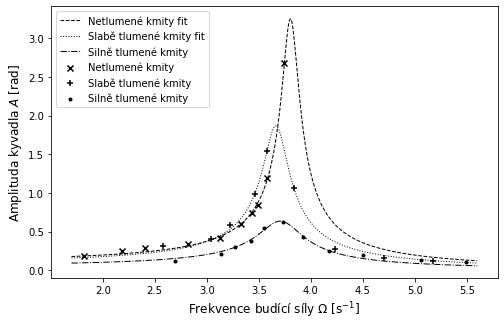

In [108]:
x_range = np.linspace(1.7,5.6,500)

plt.figure(figsize = (8,5))

plt.scatter(frequency1,amplitude1, marker = 'x', color='black', label='Netlumené kmity')
plt.scatter(frequency2,amplitude2, marker = '+', color='black', label='Slabě tlumené kmity')
plt.scatter(frequency3,amplitude3, marker = '.', color='black', label='Silně tlumené kmity')

plt.plot(x_range, forced_funkce(x_range, d1,omega1,B1), color="k", linestyle='dashed', linewidth=1, label='Netlumené kmity fit')
plt.plot(x_range, forced_funkce(x_range, d2,omega2,B2), color="k", linestyle='dotted', linewidth=1, label='Slabě tlumené kmity fit')
plt.plot(x_range, forced_funkce(x_range, d3,omega3,B3), color="k", linestyle='dashdot', linewidth=1, label='Silně tlumené kmity')

plt.legend(loc='upper left')

#popisky os
plt.ylabel("Amplituda kyvadla $A$ [rad]", fontsize=12)
plt.xlabel("Frekvence budící síly $\Omega$ [s$^{-1}$]", fontsize=12)


plt.savefig('Resonance_curve.pdf')
plt.show()

In [114]:
k = np.array([3.814867633819167,3.6757341529385594,3.727226103275367])
#k_err = np.array([0.022987008832927945,0.008662225912303222,0.01970941048765986])
k_err = np.array([1,1,1])

m,n = weighted_error(k,k_err)

print("Vysledna zprumerovana frekvence: " , m)
print("Chyba: " , n )

Vysledna zprumerovana frekvence:  3.739275963344364
Chyba:  0.5773502691896258


In [115]:
w0 ####   w0 z ukolu 1 pro porovnani

3.743460850460599